In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.stock_info as si

data=si.get_data("^FCHI",start_date="2005-01-01",end_date="2020-11-15").drop(columns=["ticker"])
data_gr=si.get_data("^GDAXI",start_date="2005-01-01",end_date="2020-11-15").drop(columns=["ticker"])
data_ib=si.get_data("^IBEX",start_date="2005-01-01",end_date="2020-11-15").drop(columns=["ticker"])
print(data['close'])


2005-01-03    3855.679932
2005-01-04    3863.300049
2005-01-05    3829.360107
2005-01-06    3856.479980
2005-01-07    3877.959961
                 ...     
2020-11-09    5336.319824
2020-11-10    5418.970215
2020-11-11    5445.209961
2020-11-12    5362.569824
2020-11-13    5380.160156
Name: close, Length: 4062, dtype: float64


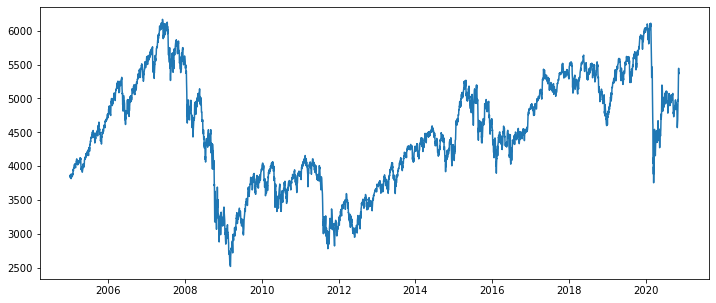

In [2]:
plt.figure(figsize=(12,5))
plt.plot(data['close'])

In [3]:
#removed nan data
"""for data in ds:
    data[data.isnull().any(axis=1)]
    data = data.dropna()
    print(data.shape)"""

data[data.isnull().any(axis=1)]
data= data.dropna()
data_gr[data_gr.isnull().any(axis=1)]
data_gr= data_gr.dropna()
data_ib[data_ib.isnull().any(axis=1)]
data_ib= data_ib.dropna()
data.shape,data_ib.shape,data_gr.shape

((4056, 6), (4051, 6), (4026, 6))

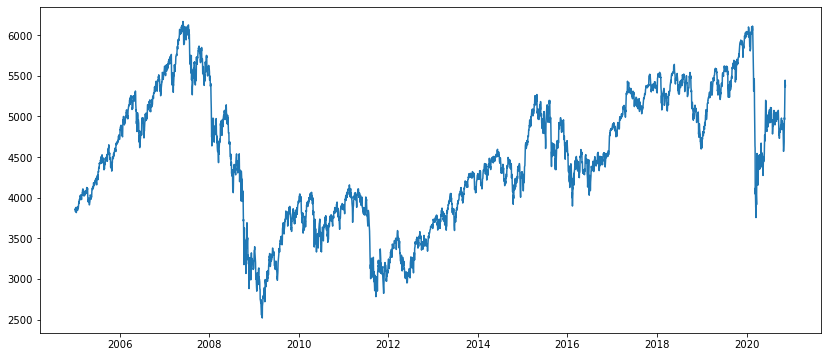

In [4]:
plt.figure(figsize=(14,6))
plt.plot(data['close'])

In [5]:
df1=data.reset_index()['close']
dfg1=data_gr.reset_index()['close']
dfi1=data_ib.reset_index()['close']

#df1,dfo1

In [6]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
print(training_size,test_size)
train_data=df1[0:training_size]
test_data=df1[training_size:]
test_data=test_data.reset_index(drop=True)

training_size_gr=int(len(dfg1)*0.75)
test_size_gr=len(dfg1)-training_size_gr
print(training_size_gr,test_size_gr)
train_data_gr=dfg1[0:training_size_gr]
test_data_gr=dfg1[training_size_gr:]
test_data_gr=test_data_gr.reset_index(drop=True)

training_size_ib=int(len(dfi1)*0.75)
test_size_ib=len(dfi1)-training_size_ib
print(training_size_ib,test_size_ib)
train_data_ib=dfi1[0:training_size_ib]
test_data_ib=dfi1[training_size_ib:]
test_data_ib=test_data_ib.reset_index(drop=True)

3042 1014
3019 1007
3038 1013


In [7]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data=scaler.transform(np.array(test_data).reshape(-1,1))
train_data,test_data

scaler_gr=MinMaxScaler(feature_range=(0,1))
train_data_gr=scaler_gr.fit_transform(np.array(train_data_gr).reshape(-1,1))
test_data_gr=scaler_gr.transform(np.array(test_data_gr).reshape(-1,1))

scaler_ib=MinMaxScaler(feature_range=(0,1))
train_data_ib=scaler_ib.fit_transform(np.array(train_data_ib).reshape(-1,1))
test_data_ib=scaler_ib.transform(np.array(test_data_ib).reshape(-1,1))

In [8]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        if(len(dataset)-i-1>=time_step):
            a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
            dataX.append(a)
            dataY.append(dataset[i + time_step])#print(i,a)
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train_gr, y_train_gr = create_dataset(train_data_gr, time_step)
X_test_gr, y_test_gr = create_dataset(test_data_gr, time_step)
X_train_ib, y_train_ib = create_dataset(train_data_ib, time_step)
X_test_ib, y_test_ib = create_dataset(test_data_ib, time_step)

In [10]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

X_train_gr =X_train_gr.reshape(X_train_gr.shape[0],X_train_gr.shape[1] , 1)
X_test_gr = X_test_gr.reshape(X_test_gr.shape[0],X_test_gr.shape[1] , 1)

X_train_ib =X_train_ib.reshape(X_train_ib.shape[0],X_train_ib.shape[1] , 1)
X_test_ib = X_test_ib.reshape(X_test_ib.shape[0],X_test_ib.shape[1] , 1)

In [11]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)
model.fit(X_train_ib,y_train_ib,validation_data=(X_test_ib,y_test_ib),epochs=20,batch_size=64,verbose=1)
#model.fit(X_train_oil,y_train_oil,validation_data=(X_test_oil,y_test_oil),epochs=20,batch_size=64,verbose=1)
model.fit(X_train_gr,y_train_gr,validation_data=(X_test_gr,y_test_gr),epochs=20,batch_size=64,verbose=1)


Epoch 1/20
46/46 [==============================] - 9s 188ms/step - loss: 0.0265 - val_loss: 0.0033
Epoch 2/20
46/46 [==============================] - 7s 154ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 3/20
46/46 [==============================] - 7s 150ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 4/20
46/46 [==============================] - 7s 144ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 5/20
46/46 [==============================] - 7s 154ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 6/20
46/46 [==============================] - 7s 156ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 7/20
46/46 [==============================] - 7s 148ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/20
46/46 [==============================] - 7s 163ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 9/20
46/46 [==============================] - 7s 143ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 10/20
46/46 [==============================] - 7s 151ms/step - loss: 0.0011 - val_loss: 0.0022

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#train_predict,test_predict,y_train,y_test

In [ ]:
### Calculate MSE performance metrics for train set
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(scaler.inverse_transform(y_train),train_predict)

In [ ]:
### Test Data MSE
print(mean_squared_error(scaler.inverse_transform(y_test),test_predict))
train_predict=train_predict.reshape(-1)
test_predict=test_predict.reshape(-1)

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
plt.figure(figsize=(20,8))
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y_test))
plt.plot(test_predict)
#plt.plot(train_predict)

In [ ]:
scaler2=MinMaxScaler(feature_range=(0,1))
df2=scaler2.fit_transform(np.array(df1).reshape(-1,1))
n=len(data.index)-100
temp_data=np.array(df2[n:]).reshape(1,-1)
print(temp_data.shape)
temp_input=list(temp_data)
temp_input=temp_input[0].tolist()
#temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        temp_data = temp_data.reshape((1, n_steps,1))
        yhat = model.predict(temp_data, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
plt.plot(day_new,scaler2.inverse_transform(df2[n:]))
plt.plot(day_pred,scaler2.inverse_transform(lst_output))

In [ ]:
df3=df2[n:].tolist()
df3.extend(lst_output)
plt.plot(scaler2.inverse_transform(lst_output))


In [ ]:
outi=scaler2.inverse_transform(lst_output)
print("Outputs for each day")
for i in outi.reshape(10):
    print(i)

In [ ]:
plt.plot(df3)